## Importing the required library 

In [1]:
#import modules
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import squarify
#Magical Command to execute multiple query in one row
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")

## Importing the data


In [2]:
data = pd.read_csv("Jan - Dec 2019_RFM_Initial.csv")

## Exploratory Data Analysis

#### 1. Checking top five data

In [3]:
data.head(2)

,Customer_Name,Customer_ID,Order_No,Order_Date,Invoiced,SKU_Code,Quantity,City
0,Natasha Sethi,10993,M0110013,2019-08-22,1797.0,SWM17614C0512L,1,Gurgaon
1,Sneha Ganesan,6206,M0110014,2019-08-22,995.0,BRA72501C060636B,1,Mumbai


#### 2. Checking bottom five data

In [4]:
data.tail(2)

,Customer_Name,Customer_ID,Order_No,Order_Date,Invoiced,SKU_Code,Quantity,City
19115,Arshpreet Kaur,2075,M02866,2019-12-17,1147.5,F0007C060934DD,1,Chandigaeh
19116,Nandita Dave,10952,M02870,2019-12-23,2295.0,E0006C000438DD,1,Kolkata


#### 3. Statistics information about data

In [5]:
data.describe()

,Customer_ID,Invoiced,Quantity
count,19117.000000,19117.000000,19117.000000
mean,10320.195114,793.912288,1.035466
std,6005.041538,511.413797,0.221981
min,2.000000,0.000000,1.000000
25%,4669.000000,495.000000,1.000000
50%,10453.000000,647.500000,1.000000
75%,15565.000000,990.000000,1.000000
max,20608.000000,6190.000000,8.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19117 entries, 0 to 19116
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer_Name  19117 non-null  object 
 1   Customer_ID    19117 non-null  int64  
 2   Order_No       19117 non-null  object 
 3   Order_Date     19117 non-null  object 
 4   Invoiced       19117 non-null  float64
 5   SKU_Code       19117 non-null  object 
 6   Quantity       19117 non-null  int64  
 7   City           19084 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.2+ MB


#### Box plot between customer name and invoce 

<Figure size 1440x360 with 0 Axes>

<AxesSubplot:>

Text(0.5, 0, 'Numeric Features')

Text(0, 0.5, 'Values')

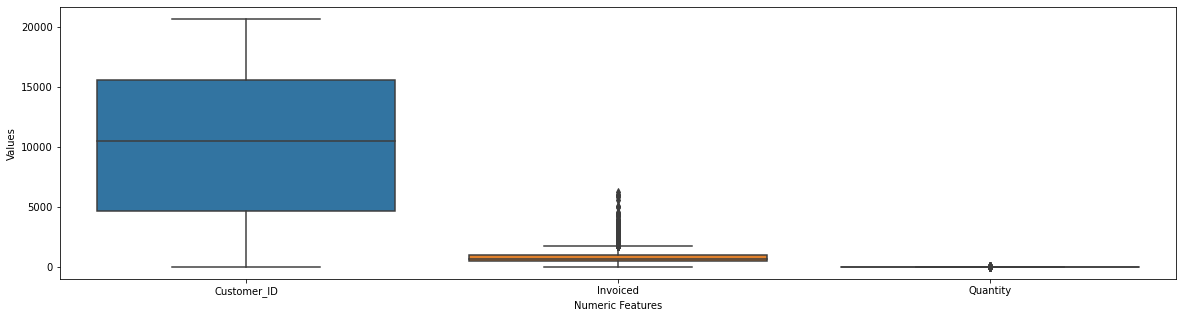

In [7]:
plt.figure(figsize=(20,5))
sns.boxplot(data=data)
plt.xlabel("Numeric Features")
plt.ylabel("Values")

<AxesSubplot:xlabel='SKU_Code'>

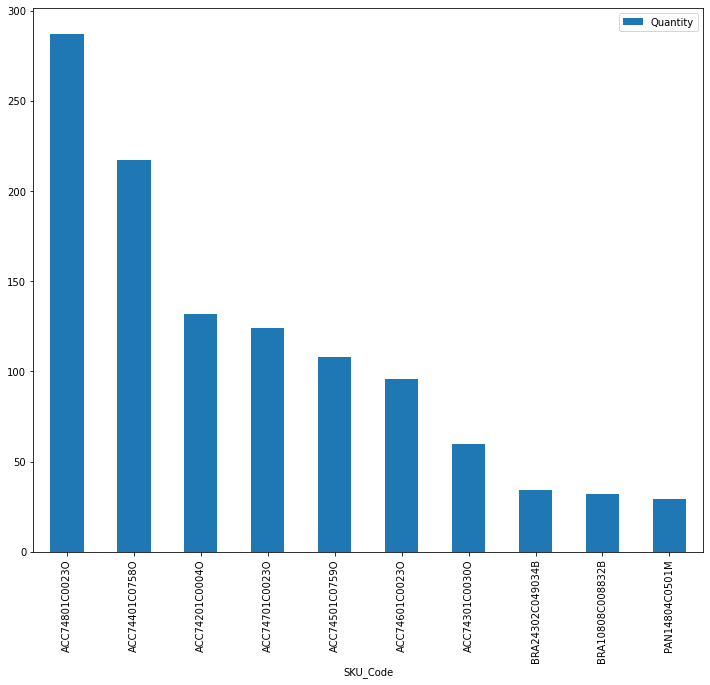

In [8]:
#Top Sku_Code Based on quantity
prod_Quantity = pd.DataFrame(data.groupby('SKU_Code').sum()['Quantity'])

prod_Quantity.sort_values(by=['Quantity'], inplace=True, ascending=False)

top_Quantity = prod_Quantity.head(10)

top_Quantity.plot(kind='bar',figsize=(12,10))
plt.show()



#Top Sku_Code Based on Gross_Margin
prod_profit = pd.DataFrame(data.groupby('SKU_Code').sum()['Gross_Margin_Rs'])

prod_profit.sort_values(by=['Gross_Margin_Rs'], inplace=True, ascending=False)

top_prods = prod_profit.head(10)

top_prods.plot(kind='bar',figsize=(12,10))
plt.show()


#### Most Gross_Margin by City

#Top Sku_Code Based on Gross_Margin
city_profit = pd.DataFrame(data.groupby('City').sum()['Gross_Margin_Rs'])

city_profit.sort_values(by=['Gross_Margin_Rs'], inplace=True, ascending=False)

top_city_prods = city_profit.head(10)

top_city_prods.plot(kind='bar',figsize=(12,10))
plt.show()

##### Most product selling city

<AxesSubplot:>

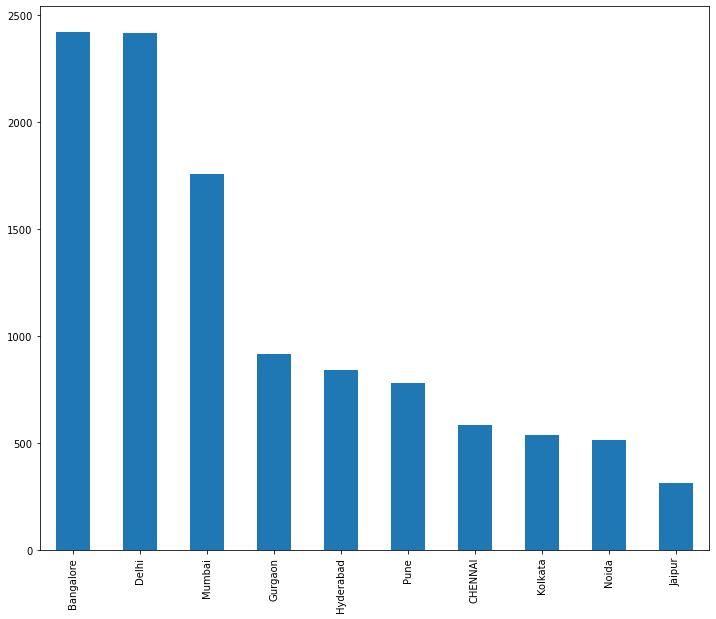

In [9]:
data['City'].value_counts().head(10).plot(kind='bar',figsize=(12,10))

### RFM Analysis

* For Recency, Calculate the number of days between present date and date of last purchase each customer.For Frequency, Calculate the number of orders for each customer.For Monetary, Calculate sum of purchase price for each customer.


In [10]:
import datetime as dt
maxDate = dt.datetime(2019,12,31)

In [11]:
# change the date time column datetime
data["Order_Date"]=pd.to_datetime(data['Order_Date'])
data["date"]=pd.DatetimeIndex(data['Order_Date']).date

In [12]:
data_rfm=data[['Customer_ID','Customer_Name','Order_No','Order_Date','Invoiced','SKU_Code']]
data_rfm

,Customer_ID,Customer_Name,Order_No,Order_Date,Invoiced,SKU_Code
0,10993,Natasha Sethi,M0110013,2019-08-22,1797.0,SWM17614C0512L
1,6206,Sneha Ganesan,M0110014,2019-08-22,995.0,BRA72501C060636B
2,2278,ASHUTOSH GARG,M0110016,2019-08-22,327.0,PAN26403C0676M
3,3867,Deepika Chawla,M0110018,2019-08-23,0.0,BRA10301C032434C
4,2278,ASHUTOSH GARG,M0110019,2019-08-23,1737.0,SLP70202C0676M
...,...,...,...,...,...,...
19112,2075,Arshpreet Kaur,M02866,2019-12-17,2795.0,F0008C062034DD
19113,2075,Arshpreet Kaur,M02866,2019-12-17,1497.5,F0001C052634DD
19114,2075,Arshpreet Kaur,M02866,2019-12-17,2295.0,F0007C061034DD
19115,2075,Arshpreet Kaur,M02866,2019-12-17,1147.5,F0007C060934DD


rfm_df = data_rfm.groupby('Customer_Name').agg({'Order_Date': lambda x: (maxDate - x.max()).days,
                                        'Order_No': lambda x: len(x), 
                                        'Invoiced': lambda x: x.sum(),
                                        'Gross_Margin_Rs':lambda x: x.sum(),
                                        'SKU_Code': lambda x: x.nunique()})
rfm_df.rename(columns={'Order_Date': 'Recency', 
                         'Order_No': 'Frequency', 
                         'Invoiced': 'Monetary',
                         'Gross_Margin_Rs':'Profit',
                         'SKU_Code': 'numProduct'}, inplace=True)

In [13]:
rfm_df = data_rfm.groupby('Customer_ID').agg({'Order_Date': lambda x: (maxDate - x.max()).days,
                                        'Order_No': lambda x: len(x), 
                                        'Invoiced': lambda x: x.sum(),
                                        'SKU_Code': lambda x: x.nunique()})
rfm_df.rename(columns={'Order_Date': 'Recency', 
                         'Order_No': 'Frequency', 
                         'Invoiced': 'Monetary',
                         'SKU_Code': 'numProduct'}, inplace=True)

##### Validating the RFM Table

In [14]:
rfm_df.head()

,Recency,Frequency,Monetary,numProduct
Customer_ID,,,,
2,13,4,2612.5,4
4,40,2,60.2,2
6,43,1,611.6,1
7,37,1,611.6,1
9,152,1,957.0,1


In [15]:
rfm_df.sort_values('Recency',ascending=False).head(5)

,Recency,Frequency,Monetary,numProduct
Customer_ID,,,,
12959,364,1,6190.0,1
12068,364,1,1148.0,1
8629,364,2,844.0,2
3221,364,2,1842.0,2
17346,364,1,998.0,1


In [16]:
rfm_df.sort_values('Frequency',ascending=False).head(5)

,Recency,Frequency,Monetary,numProduct
Customer_ID,,,,
12280,51,40,38724.76,26
15626,89,26,10256.80,26
11532,121,21,15144.00,21
312,18,20,14993.00,20
6522,55,19,13478.52,19


In [17]:
rfm_df.sort_values('Monetary',ascending=False).head(5)

,Recency,Frequency,Monetary,numProduct
Customer_ID,,,,
12280,51,40,38724.76,26
20284,98,10,19052.51,10
1158,100,17,17006.00,17
3493,153,14,16965.01,12
15821,291,7,16913.00,5


#plt.figure(figsize=(20,5))
sns.boxplot(data=rfm_df['Recency'])

sns.boxplot(data=rfm_df['Frequency'])

sns.boxplot(data=rfm_df['Monetary'])

sns.boxplot(data=rfm_df['Profit'])

sns.boxplot(data=rfm_df['numProduct'])

##### Determining RFM Quartiles

In [18]:
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary,numProduct
0.25,41.0,1.0,611.6,1.0
0.50,84.0,1.0,1137.0,1.0
0.75,193.0,2.0,1990.0,2.0


##### Send quantiles to a dictionary, easier to use

In [19]:
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 41.0, 0.5: 84.0, 0.75: 193.0},
 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 2.0},
 'Monetary': {0.25: 611.6, 0.5: 1137.0, 0.75: 1990.0},
 'numProduct': {0.25: 1.0, 0.5: 1.0, 0.75: 2.0}}

##### Creating the RFM segmentation

###### We create two classes for the RFM segmentation since, being high recency is bad, while high frequency and monetary value is good.

<Figure size 864x720 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='Recency'>

<AxesSubplot:>

<AxesSubplot:xlabel='Frequency'>

<AxesSubplot:>

<AxesSubplot:xlabel='Monetary'>

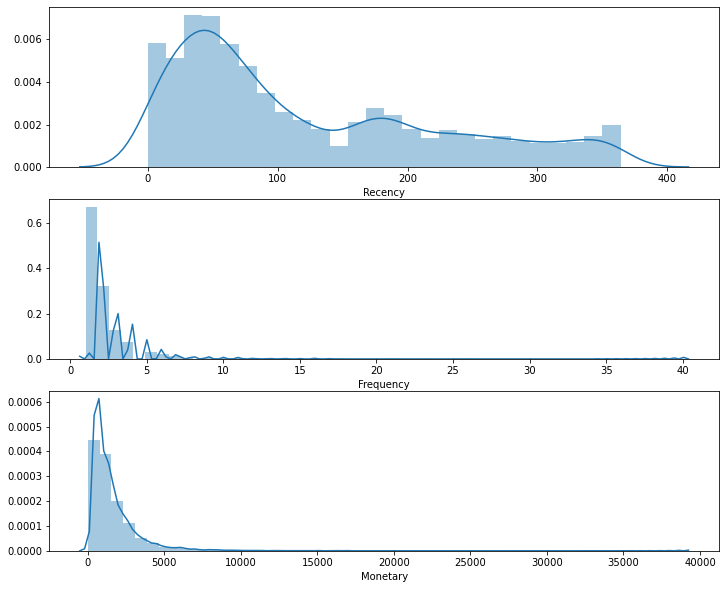

In [20]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); 
sns.distplot(rfm_df['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); 
sns.distplot(rfm_df['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); 
sns.distplot(rfm_df['Monetary'])
# Show the plot
plt.show()

* above plot provides us with some very interesting insights and how skewed our data is. The important thing to take note here is that we will be grouping these values in quantiles. 

###### In the case of receny, lower is better and hence our categorising scheme need to be reverse.

In [21]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    

def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [22]:
rfm_df['R_Quartile'] = rfm_df['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_df['F_Quartile'] = rfm_df['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_df['M_Quartile'] = rfm_df['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

*Options 1.For analysis it is critical to combine the scores to create a single score. just concatenate the scores to create a 3 digit number between 111 and 444 , drawback is too many categories (4x4x4). Also, not easy prioritise scores like 421 vs 412

In [23]:
rfm_df['RFMScore'] = rfm_df.R_Quartile.map(str) \
                            + rfm_df.F_Quartile.map(str) \
                            + rfm_df.M_Quartile.map(str)

##### Based on business requirements, various cut-offs are imposed on each of the three parameters (RFM).

In [24]:
print("Best Customers: ",len(rfm_df[rfm_df['RFMScore']=='444']))
print('Loyal Customers: ',len(rfm_df[rfm_df['F_Quartile']==4]))
print("Big Spenders: ",len(rfm_df[rfm_df['M_Quartile']==4]))
print('Lost Customers: ',len(rfm_df[rfm_df['RFMScore']=='111']))
print('test need change : ',len(rfm_df[rfm_df['RFMScore']=='444']))

Best Customers:  192
Loyal Customers:  4921
Big Spenders:  2362
Lost Customers:  347
test need change :  192


* Customers clearing all the three (RFM) cut-offs are the best and the most reliable customers. Business should focus on making customised promotional strategies and loyalty schemes for these customers in order to retain this valuable customer base.

* Customers failing the recency criterion only are those customers who have stopped visiting the store. Business should focus on these customers and look out for the reason why they abandoned visiting the stores.

* Customers clearing the recency criterion but failing frequency criterion are the new customers. Business should provide more incentives and offers to these customers and try to retain these new customers.

#### Recommendation:

* Best Customers -  Reward them. 

* At Risk: Send them personalized emails/message to encourage them to shop.

###### Options 2. is to combine the scores to create one score (eg. 4+2+3). This will create a score between 3 and 12. Here the sdvantage is that each of the scores got same importance. However some scores will have many sgements as constituents

In [25]:
rfm_df['Total Score'] = rfm_df['R_Quartile'] + rfm_df['F_Quartile'] +rfm_df['M_Quartile']
rfm_df.head()
rfm_df.info()

,Recency,Frequency,Monetary,numProduct,R_Quartile,F_Quartile,M_Quartile,RFMScore,Total Score
Customer_ID,,,,,,,,,
2,13,4,2612.5,4,1,1,1,111,3
4,40,2,60.2,2,1,2,4,124,7
6,43,1,611.6,1,2,4,4,244,10
7,37,1,611.6,1,1,4,4,144,9
9,152,1,957.0,1,3,4,3,343,10


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9405 entries, 2 to 20608
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Recency      9405 non-null   int64  
 1   Frequency    9405 non-null   int64  
 2   Monetary     9405 non-null   float64
 3   numProduct   9405 non-null   int64  
 4   R_Quartile   9405 non-null   int64  
 5   F_Quartile   9405 non-null   int64  
 6   M_Quartile   9405 non-null   int64  
 7   RFMScore     9405 non-null   object 
 8   Total Score  9405 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 734.8+ KB


In [26]:
rfm_df.groupby('Total Score').agg('Monetary').mean()

Total Score
3     3806.378069
4     3044.410060
5     3221.147538
6     2494.841288
7     1685.093598
8     1186.904604
9      860.354886
10     770.886751
11     695.487573
12     483.031250
Name: Monetary, dtype: float64

##### Combined score arrange R,F and M

* Recency is the most important predictor of who is more likely to respond to an offer. Customers who have purchased recently are more likely to purchase again when compared to those who did not purchase recently.   

Text(0.5, 1.0, 'Proportion of Recency with Total Score')

Text(0, 0.5, 'Total Score')

Text(0.5, 0, 'Proportion of Recency')

Text(-0.15, 21.46829971181556, '20.97')

Text(0.85, 45.12, '44.62')

Text(1.85, 95.83585313174946, '95.34')

Text(2.85, 141.71321070234114, '141.21')

Text(3.85, 145.37809712586719, '144.88')

Text(4.85, 128.6933962264151, '128.19')

Text(5.85, 87.54545454545455, '87.05')

Text(6.85, 131.04260582737768, '130.54')

Text(7.85, 219.26461988304092, '218.76')

Text(8.85, 285.734375, '285.23')

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

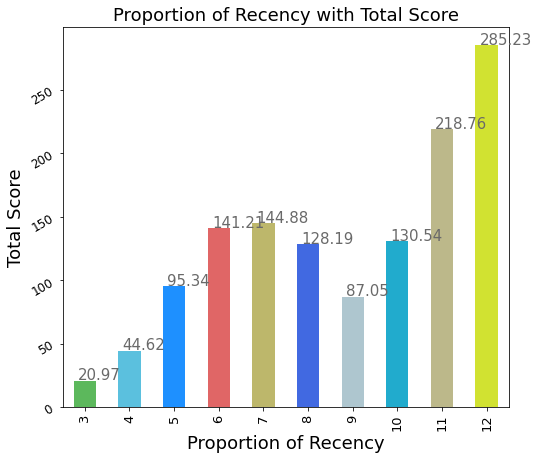

In [27]:
colors = ['#5cb85c','#5bc0de','#1e90ff','#e06666','#bdb76b','#4169e1','#aec6cf','#21abcd','#bcb88a','#d1e231']
ax=rfm_df.groupby('Total Score').agg('Recency').mean().plot(kind='bar', color=colors,figsize=(8,7),fontsize=13)
ax.set_alpha(0.8)
ax.set_title("Proportion of Recency with Total Score", fontsize=18)
ax.set_ylabel("Total Score", fontsize=18);
ax.set_xlabel("Proportion of Recency", fontsize=18);
# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())
# set individual bar lables using above list
total = sum(totals)
# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.1, i.get_height()+.5, \
            str(round(i.get_height(), 2)), fontsize=15,
                color='dimgrey')
#plt.xticks(rotation =30,fontsize =12)
plt.yticks(rotation =30,fontsize =12)  
plt.savefig("Proportion of Recency with Total Score.jpg")


* second most important factor is how frequently these customers purchase. The higher the frequency, the higher is the chances of these responding to the offers.

Text(0.5, 0, 'Total Score')

Text(0, 0.5, 'Proportion of Frequency')

Text(0.5, 1.0, 'Proportion of Frequency with Total Score')

Text(0, 0.5, 'Total Score')

Text(0.5, 0, 'Proportion of Frequency')

Text(-0.55, 5.326657060518732, '5.28')

Text(0.45, 4.25, '4.2')

Text(1.45, 3.864254859611231, '3.81')

Text(2.45, 2.968896321070234, '2.92')

Text(3.45, 2.0668483647175417, '2.02')

Text(4.45, 1.549056603773585, '1.5')

Text(5.45, 1.1433014354066986, '1.09')

Text(6.45, 1.0587960417811986, '1.01')

Text(7.45, 1.05, '1.0')

Text(8.45, 1.05, '1.0')

Text(-0.55, 5.326657060518732, '5.28')

Text(0.45, 4.25, '4.2')

Text(1.45, 3.864254859611231, '3.81')

Text(2.45, 2.968896321070234, '2.92')

Text(3.45, 2.0668483647175417, '2.02')

Text(4.45, 1.549056603773585, '1.5')

Text(5.45, 1.1433014354066986, '1.09')

Text(6.45, 1.0587960417811986, '1.01')

Text(7.45, 1.05, '1.0')

Text(8.45, 1.05, '1.0')

(array([0., 1., 2., 3., 4., 5., 6.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

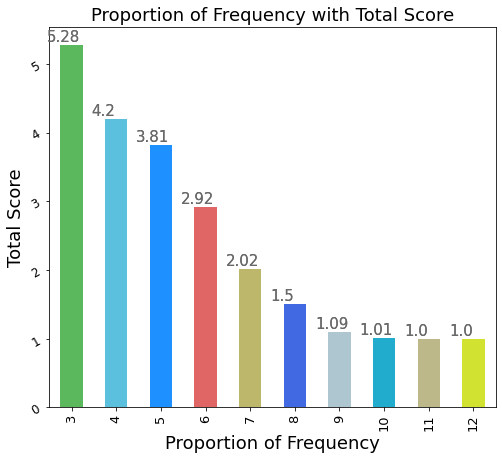

In [28]:
ax=rfm_df.groupby('Total Score').agg('Frequency').mean().plot(kind='bar', colormap='copper_r')
ax.set_xlabel("Total Score")
ax.set_ylabel("Proportion of Frequency")

colors = ['#5cb85c','#5bc0de','#1e90ff','#e06666','#bdb76b','#4169e1','#aec6cf','#21abcd','#bcb88a','#d1e231']
ax=rfm_df.groupby('Total Score').agg('Frequency').mean().plot(kind='bar', color=colors,figsize=(8,7),fontsize=13)
ax.set_alpha(0.8)
ax.set_title("Proportion of Frequency with Total Score", fontsize=18)
ax.set_ylabel("Total Score", fontsize=18);
ax.set_xlabel("Proportion of Frequency", fontsize=18);
# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())
# set individual bar lables using above list
total = sum(totals)
# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-0.3, i.get_height()+0.05, \
            str(round(i.get_height(), 2)), fontsize=15,
                color='dimgrey')
#plt.xticks(rotation =30,fontsize =12)
plt.yticks(rotation =30,fontsize =12)  
plt.savefig("Proportion of Frequency with Total Score.jpg")

* The third factor is the amount of money these customers have spent on purchases. Customers who have spent higher contribute more value to the business as compared to those who have spent less.

Text(0.5, 1.0, 'Proportion of Monetary with Total Score')

Text(0, 0.5, 'Total Score')

Text(0.5, 0, 'Proportion of Frequency')

Text(-0.04999999999999999, 5.326657060518732, '5.28')

Text(0.95, 4.25, '4.2')

Text(1.95, 3.864254859611231, '3.81')

Text(2.95, 2.968896321070234, '2.92')

Text(3.95, 2.0668483647175417, '2.02')

Text(4.95, 1.549056603773585, '1.5')

Text(5.95, 1.1433014354066986, '1.09')

Text(6.95, 1.0587960417811986, '1.01')

Text(7.95, 1.05, '1.0')

Text(8.95, 1.05, '1.0')

(array([0., 1., 2., 3., 4., 5., 6.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

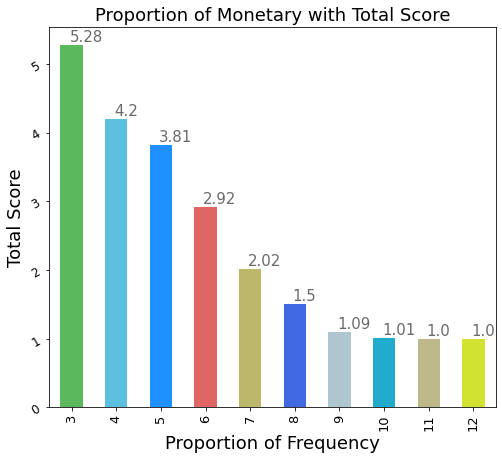

In [29]:
colors = ['#5cb85c','#5bc0de','#1e90ff','#e06666','#bdb76b','#4169e1','#aec6cf','#21abcd','#bcb88a','#d1e231']
ax=rfm_df.groupby('Total Score').agg('Frequency').mean().plot(kind='bar', color=colors,figsize=(8,7),fontsize=13)
ax.set_alpha(0.8)
ax.set_title("Proportion of Monetary with Total Score", fontsize=18)
ax.set_ylabel("Total Score", fontsize=18);
ax.set_xlabel("Proportion of Frequency", fontsize=18);
# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())
# set individual bar lables using above list
total = sum(totals)
# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.2, i.get_height()+0.05, \
            str(round(i.get_height(), 2)), fontsize=15,
                color='dimgrey')
#plt.xticks(rotation =30,fontsize =12)
plt.yticks(rotation =30,fontsize =12)  
plt.savefig("Proportion of Monetary with Total Score.jpg")

* From above three plot based on Total Score is more consistent then options 1

##### Define rfm level function to label data based on below condition

In [30]:
def rfm_level(rfm_df):
    if rfm_df['Total Score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((rfm_df['Total Score'] >= 8) and (rfm_df['Total Score'] < 9)):
        return 'Champions'
    elif ((rfm_df['Total Score'] >= 7) and (rfm_df['Total Score'] < 8)):
        return 'Loyal'
    elif ((rfm_df['Total Score'] >= 6) and (rfm_df['Total Score'] < 7)):
        return 'Potential'
    elif ((rfm_df['Total Score'] >= 5) and (rfm_df['Total Score'] < 6)):
        return 'Promising'
    elif ((rfm_df['Total Score'] >= 4) and (rfm_df['Total Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'
# Create a new variable RFM_Level
rfm_df['RFM_Level'] = rfm_df.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the console
rfm_df

,Recency,Frequency,Monetary,numProduct,R_Quartile,F_Quartile,M_Quartile,RFMScore,Total Score,RFM_Level
Customer_ID,,,,,,,,,,
2,13,4,2612.5,4,1,1,1,111,3,Require Activation
4,40,2,60.2,2,1,2,4,124,7,Loyal
6,43,1,611.6,1,2,4,4,244,10,Can't Loose Them
7,37,1,611.6,1,1,4,4,144,9,Can't Loose Them
9,152,1,957.0,1,3,4,3,343,10,Can't Loose Them
...,...,...,...,...,...,...,...,...,...,...
20601,181,4,3290.0,4,3,1,1,311,5,Promising
20602,160,1,1397.5,1,3,4,2,342,9,Can't Loose Them
20603,56,2,3390.0,2,2,2,1,221,5,Promising


Text(0.5, 1.0, 'Proportion of Customers with RFM_Level')

Text(0, 0.5, 'Number of Customers')

Text(0.5, 0, 'RFM Level')

Text(-0.04999999999999999, 4367.05, '4367')

Text(0.95, 1196.05, '1196')

Text(1.95, 1060.05, '1060')

Text(2.95, 1009.05, '1009')

Text(3.95, 926.05, '926')

Text(4.95, 500.05, '500')

Text(5.95, 347.05, '347')

(array([   0., 1000., 2000., 3000., 4000., 5000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

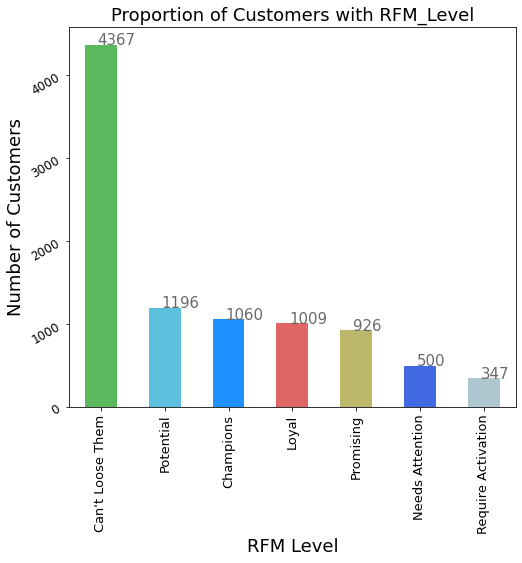

In [31]:
#rfm_df['RFM_Level'].value_counts().head(10).plot(kind='bar',figsize=(12,10),colormap='copper_r')

colors = ['#5cb85c','#5bc0de','#1e90ff','#e06666','#bdb76b','#4169e1','#aec6cf','#21abcd','#bcb88a','#d1e231']
ax=rfm_df['RFM_Level'].value_counts().head(10).plot(kind='bar', color=colors,figsize=(8,7),fontsize=13)
ax.set_alpha(0.8)
ax.set_title("Proportion of Customers with RFM_Level", fontsize=18)
ax.set_ylabel("Number of Customers", fontsize=18);
ax.set_xlabel("RFM Level", fontsize=18);
# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())
# set individual bar lables using above list
total = sum(totals)
# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.2, i.get_height()+0.05, \
            str(round(i.get_height(), 2)), fontsize=15,
                color='dimgrey')
#plt.xticks(rotation =30,fontsize =12)
plt.yticks(rotation =30,fontsize =12)  
plt.savefig("Proportion of Customers with RFM_Level.jpg")

In [32]:
# Calculate average values for each RFM_Level, and return a size of each segment 
cust_seg_agg = rfm_df.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count',]
}).round(1)
# Print the aggregated dataset
cust_seg_agg

Recency Frequency Monetary      
                      mean      mean     mean count
RFM_Level                                          
Can't Loose Them     134.5       1.0    780.7  4367
Champions            128.2       1.5   1186.9  1060
Loyal                144.9       2.0   1685.1  1009
Needs Attention       44.6       4.2   3044.4   500
Potential            141.2       2.9   2494.8  1196
Promising             95.3       3.8   3221.1   926
Require Activation    21.0       5.3   3806.4   347

### Recommendation:

* Potential: High potential to enter our loyal customer segments, why not throw in some offers/Coupons on their next purchase to show that you value them!

* Promising: Showing promising signs with quantity and value of their purchase but it has been a while since they last bought sometime from you. Let’s target them with their wishlist items and a limited time offer discount/Coupons.

* Needs Attention: made some initial purchase but have not seen them since. Was it a bad customer experience? Or product-market fit? Let’s spend some resource build our brand awareness with them.

* Require Activation: Poorest performers of our RFM model. They might have went with our competitors for now and will require a different activation strategy to win them back.

<AxesSubplot:>

Text(0.5, 1.0, 'Segments')

(0.0, 100.0, 0.0, 100.0)

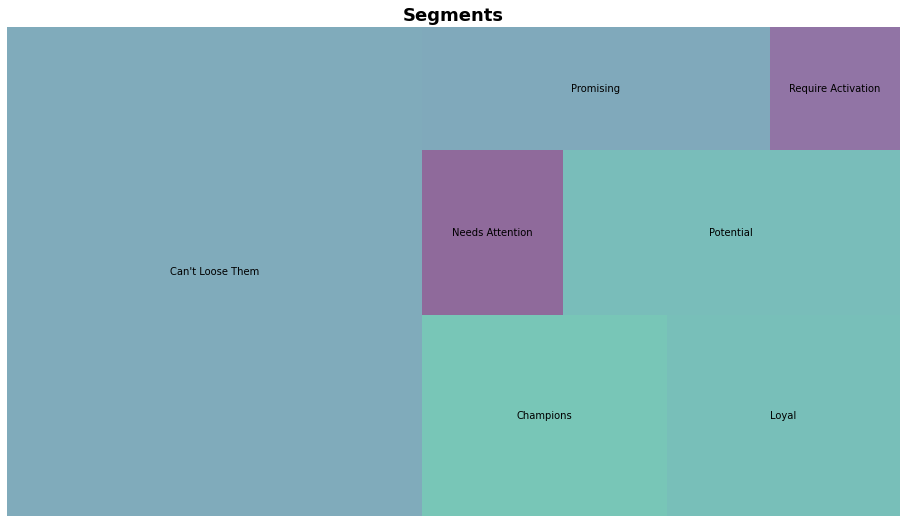

In [33]:
cust_seg_agg.columns = cust_seg_agg.columns#.droplevel()
cust_seg_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=cust_seg_agg['Count'], 
              label=['Can\'t Loose Them',
                     'Champions',
                     'Loyal',
                     'Needs Attention',
                     'Potential', 
                     'Promising', 
                     'Require Activation'], alpha=.6 )
plt.title("Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

###  Thank You